<a href="https://colab.research.google.com/github/BrenoMilagres/DataScienceProjetos/blob/master/TCCbrenoMilagresU5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving campeonato-brasileiro-full.csv to campeonato-brasileiro-full.csv


In [ ]:
times = pd.read_csv('campeonato-brasileiro-full.csv')
times.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [ ]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Horário                7582 non-null   object
 1   Dia                    7939 non-null   object
 2   Data                   7939 non-null   object
 3   Clube 1                7939 non-null   object
 4   Clube 2                7939 non-null   object
 5   Vencedor               7939 non-null   object
 6   Rodada                 7939 non-null   object
 7   Arena                  7939 non-null   object
 8   Clube 1 Gols           7939 non-null   int64 
 9   Clube 2 Gols           7939 non-null   int64 
 10  Clube 1 Estado         7939 non-null   object
 11  Clube 2 Estado         7939 non-null   object
 12  Estado Clube Vencedor  7939 non-null   object
dtypes: int64(2), object(11)
memory usage: 806.4+ KB


In [ ]:
times = times.rename(columns={'Clube 1':'Mandante','Clube 2':'Visitante','Clube 1 Gols':'MandanteGols','Clube 2 Gols':'VisitanteGols'})
times.head()

,Horário,Dia,Data,Mandante,Visitante,Vencedor,Rodada,Arena,MandanteGols,VisitanteGols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [ ]:
entradas = ['Data','Mandante','Visitante','MandanteGols','VisitanteGols','Vencedor']
df_entradas = times[entradas]

In [ ]:
df_entradas['Data']= pd.to_datetime(df_entradas['Data'],format='%Y/%m/%d')
df_entradas['Ano'] = df_entradas['Data'].dt.year
df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           7939 non-null   datetime64[ns]
 1   Mandante       7939 non-null   object        
 2   Visitante      7939 non-null   object        
 3   MandanteGols   7939 non-null   int64         
 4   VisitanteGols  7939 non-null   int64         
 5   Vencedor       7939 non-null   object        
 6   Ano            7939 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 434.3+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Total de gols marcados útimos 3 jogos Mandante
df_entradas['nGF_U3_Mandante'] = (df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(2) +
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(3)+
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(4)+
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(5)
)

# Total dos gols marcados útimos 3 jogos Visitante
df_entradas['nGF_U3_Visitante'] = (df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(2) +
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(3)+
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(4)+
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(5)
)

# Total de  gols sofridos ultimos 3 jogos Mandante
df_entradas['nGS_U3_Mandante'] = (df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(2) +
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(3)+
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(4)+
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(5)
)

# Total de  gols sofridos ultimos 3 jogos Visitante
df_entradas['nGS_U3_Visitante'] = (df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(2) +
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(3) +
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(4) +
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(5) 
)


df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              7939 non-null   datetime64[ns]
 1   Mandante          7939 non-null   object        
 2   Visitante         7939 non-null   object        
 3   MandanteGols      7939 non-null   int64         
 4   VisitanteGols     7939 non-null   int64         
 5   Vencedor          7939 non-null   object        
 6   Ano               7939 non-null   int64         
 7   nGF_U3_Mandante   5753 non-null   float64       
 8   nGF_U3_Visitante  5750 non-null   float64       
 9   nGS_U3_Mandante   5753 non-null   float64       
 10  nGS_U3_Visitante  5750 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 682.4+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
df_entradas = df_entradas.loc[df_entradas['nGF_U3_Mandante'].notnull()]
df_entradas = df_entradas.loc[df_entradas['nGF_U3_Visitante'].notnull()]

df_entradas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5621 entries, 104 to 7938
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              5621 non-null   datetime64[ns]
 1   Mandante          5621 non-null   object        
 2   Visitante         5621 non-null   object        
 3   MandanteGols      5621 non-null   int64         
 4   VisitanteGols     5621 non-null   int64         
 5   Vencedor          5621 non-null   object        
 6   Ano               5621 non-null   int64         
 7   nGF_U3_Mandante   5621 non-null   float64       
 8   nGF_U3_Visitante  5621 non-null   float64       
 9   nGS_U3_Mandante   5621 non-null   float64       
 10  nGS_U3_Visitante  5621 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 527.0+ KB


In [ ]:
df_entradas['total_gols'] = df_entradas['MandanteGols'] + df_entradas['VisitanteGols']
df_entradas['faixa_degols'] = df_entradas['total_gols'].apply(lambda x: 0 if x<=3 else 1)
df_entradas['faixa_degols'].value_counts()

0    4058
1    1563
Name: faixa_degols, dtype: int64

In [ ]:
X = df_entradas[['Ano','nGF_U3_Mandante','nGF_U3_Visitante','nGS_U3_Mandante','nGS_U3_Visitante']]
y = df_entradas['faixa_degols']

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X, y = nr.fit_sample(X, y)
np.bincount(y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([1563, 1563])

In [ ]:
#importando o preprocessamento com o MinMax
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_escaler = sc_X.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_escaler, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("Acurácia para a classificação :  ",accuracy_score(y_pred,y_test))
print(cross_val_score(classifier, X_test, y_test,cv=5))

Acurácia para a classificação :   0.5735607675906184
[0.53723404 0.55851064 0.59042553 0.52406417 0.58823529]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_KNN = clf_KNN.predict(X_test)
print("Acurácia para a classificação utilizando o KNN:  ",accuracy_score(y_pred_KNN,y_test))
print(cross_val_score(clf_KNN, X_test, y_test,cv=5))

Acurácia para a classificação utilizando o KNN:   0.5831556503198294
[0.54787234 0.58510638 0.54787234 0.52406417 0.55614973]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("O valor de f1-score para a árvore de decisão é:\n ",classification_report(y_test,y_pred_arvore))
print(cross_val_score(clf_arvore, X_test, y_test,cv=5))

O valor de f1-score para a árvore de decisão é:
                precision    recall  f1-score   support

           0       0.58      0.58      0.58       490
           1       0.54      0.53      0.54       448

    accuracy                           0.56       938
   macro avg       0.56      0.56      0.56       938
weighted avg       0.56      0.56      0.56       938

[0.54255319 0.50531915 0.53723404 0.52941176 0.55080214]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#define a floresta randomica
clf_floresta = RandomForestClassifier(max_depth=9, random_state=1,n_estimators=100)
clf_floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_floresta = clf_floresta.predict(X_test)
print("O valor de f1-score para a floresta randômica é:\n ",classification_report(y_test,y_pred_floresta))
print(cross_val_score(clf_floresta, X_train, y_train,cv=5))

O valor de f1-score para a floresta randômica é:
                precision    recall  f1-score   support

           0       0.63      0.82      0.72       490
           1       0.71      0.48      0.57       448

    accuracy                           0.66       938
   macro avg       0.67      0.65      0.64       938
weighted avg       0.67      0.66      0.65       938

[0.66666667 0.62328767 0.63926941 0.68649886 0.61784897]


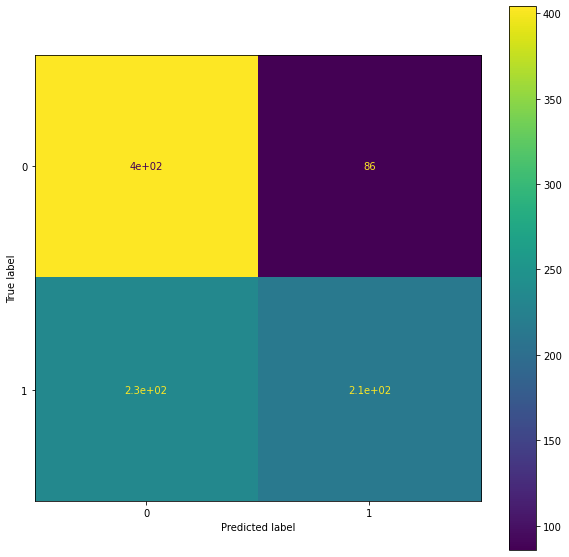

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_floresta, X_test, y_test)
plt.show()

In [ ]:
#MLP como classificador
from sklearn.neural_network import MLPClassifier
#define a configuração da rede
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)


#realiza a previsão
y_pred_mlp=clf_mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print("O valor de f1-score para MLP é:\n ",classification_report(y_test,y_pred_mlp))
print(cross_val_score(clf_mlp, X_test, y_test,cv=5))

O valor de f1-score para MLP é:
                precision    recall  f1-score   support

           0       0.62      0.69      0.65       490
           1       0.61      0.54      0.58       448

    accuracy                           0.62       938
   macro avg       0.62      0.62      0.61       938
weighted avg       0.62      0.62      0.62       938

[0.5212766  0.5212766  0.5212766  0.52406417 0.52406417]
